In [1]:
import numpy as np
import matplotlib.pyplot as plt
import h5py
from PIL import Image
%matplotlib inline
plt.rcParams['figure.figsize'] = (5.0, 4.0) # set default size of plots
plt.rcParams['image.interpolation'] = 'nearest'
plt.rcParams['image.cmap'] = 'gray'

%load_ext autoreload
%autoreload 2

np.random.seed(1)

In [2]:
train_dataset = h5py.File('/cxldata/datasets/project/cat-non-cat/train_catvnoncat.h5', "r")
train_set_x_orig = np.array(train_dataset["train_set_x"][:]) # train set features
train_set_y_orig = np.array(train_dataset["train_set_y"][:]) # train set labels

In [3]:
test_dataset = h5py.File('/cxldata/datasets/project/cat-non-cat/test_catvnoncat.h5', "r")
test_set_x_orig = np.array(test_dataset["test_set_x"][:]) # test set features
test_set_y_orig = np.array(test_dataset["test_set_y"][:]) # test set labels

In [4]:
classes = np.array(test_dataset["list_classes"][:])

In [5]:
train_set_y = train_set_y_orig.reshape((1, train_set_y_orig.shape[0]))
test_set_y = test_set_y_orig.reshape((1, test_set_y_orig.shape[0]))


[1]
cat


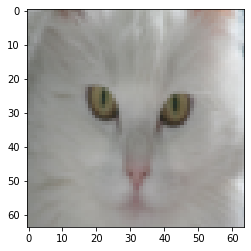

In [6]:
index = 50
plt.imshow(train_set_x_orig[index]) # You should see a cat image
y = train_set_y[:, index]
y_class = classes[np.squeeze(train_set_y[:, index])].decode("utf-8")
print(y)
print(y_class)

In [7]:
train_set_x_flatten = train_set_x_orig.reshape(train_set_x_orig.shape[0], -1).T
test_set_x_flatten = test_set_x_orig.reshape(test_set_x_orig.shape[0], -1).T
print ('train_set_x_flatten shape: ' + str(train_set_x_flatten.shape))
print ('train_set_y shape: ' + str(train_set_y.shape))
print ('test_set_x_flatten shape: ' + str(test_set_x_flatten.shape))
print ('test_set_y shape: ' + str(test_set_y.shape))
print ('sanity check after reshaping: ' + str(train_set_x_flatten[0:5,0]))

train_set_x_flatten shape: (12288, 209)
train_set_y shape: (1, 209)
test_set_x_flatten shape: (12288, 50)
test_set_y shape: (1, 50)
sanity check after reshaping: [17 31 56 22 33]


In [8]:
def sigmoid(z):
    s = 1/(1+np.exp(-z))
    return s

print ('sigmoid([0, 2]) = ' + str(sigmoid(np.array([0,2]))))

sigmoid([0, 2]) = [0.5        0.88079708]


In [9]:
def initialize_with_zeros(dim):
    w = np.zeros((dim,1))
    b = 0
    assert(w.shape == (dim, 1))
    assert(isinstance(b, float) or isinstance(b, int))
    return w, b

dim = 2
w, b = initialize_with_zeros(dim)
print ('w = ' + str(w))
print ('b = ' + str(b))

w = [[0.]
 [0.]]
b = 0


In [15]:
def propagate(w, b, X, Y):

    m = X.shape[1]
    A = sigmoid(np.dot(w.T, X) + b)
    cost = (- 1 / m)*np.sum(Y*np.log(A) + (1 - Y)*(np.log(1 - A)))

    dw = (1 / m)*np.dot(X, (A - Y).T)
    db = (1 / m)*np.sum(A - Y)

    assert(dw.shape == w.shape)
    assert(db.dtype == float)
    cost = np.squeeze(cost)
    assert(cost.shape == ())
    grads = {'dw': dw,
    'db': db}
    return grads, cost

w, b, X, Y = np.array([[1.],[2.]]), 2., np.array([[1.,2.,-1.],[3.,4.,-3.2]]), np.array([[1,0,1]])
grads, cost = propagate(w, b, X, Y)
print ('dw = ' + str(grads['dw']))
print ('db = ' + str(grads['db']))
print ('cost = ' + str(cost))

dw = [[0.99845601]
 [2.39507239]]
db = 0.001455578136784208
cost = 5.801545319394553


In [18]:
def optimize(w, b, X, Y, num_iterations, learning_rate, print_cost = False):

    costs = []
    for i in range(num_iterations):
        grads, cost = propagate(w, b, X, Y)
        dw = grads['dw']
        db = grads['db']

        w = w - learning_rate * dw
        b = b - learning_rate * db
        if i % 100 == 0:
            costs.append(cost)
        if print_cost and i % 100 == 0:
            print ('Cost after iteration %i: %f' %(i, cost))
    params = {'w': w,
    'b': b}
    grads = {'dw': dw,
    'db': db}
    return params, grads, costs

params, grads, costs = optimize(w, b, X, Y, num_iterations= 100, learning_rate = 0.009, print_cost = False)

print ('w = ' + str(params['w']))
print ('b = ' + str(params['b']))
print ('dw = ' + str(grads['dw']))
print ('db = ' + str(grads['db']))

w = [[0.19033591]
 [0.12259159]]
b = 1.9253598300845747
dw = [[0.67752042]
 [1.41625495]]
db = 0.21919450454067657


In [20]:
def predict(w, b, X):

    m = X.shape[1]
    Y_prediction = np.zeros((1,m))
    w = w.reshape(X.shape[0], 1)
    A = sigmoid(np.dot(w.T, X) + b)
    for i in range(A.shape[1]):
        Y_prediction[0, i] = 1 if A[0, i] > 0.5 else 0
        assert(Y_prediction.shape == (1, m))
        return Y_prediction

w = np.array([[0.1124579],[0.23106775]])
b = -0.3
X = np.array([[1.,-1.1,-3.2],[1.2,2.,0.1]])
print ('predictions = ' + str(predict(w, b, X)))

predictions = [[1. 0. 0.]]


In [21]:
def model(X_train, Y_train, X_test, Y_test, num_iterations = 2000, learning_rate = 0.5, print_cost = False):

    w, b = initialize_with_zeros(X_train.shape[0])

    parameters, grads, costs = optimize(w, b, X_train, Y_train, num_iterations, learning_rate, print_cost)
    w = parameters['w']
    b = parameters['b']
    Y_prediction_test = predict(w, b, X_test)
    Y_prediction_train = predict(w, b, X_train)

    print('train accuracy: {} %'.format(100 - np.mean(np.abs(Y_prediction_train - Y_train)) * 100))
    print('test accuracy: {} %'.format(100 - np.mean(np.abs(Y_prediction_test - Y_test)) * 100))

    d = {'costs': costs,
    'Y_prediction_test': Y_prediction_test,
    'Y_prediction_train' : Y_prediction_train,
    'w' : w,
    'b' : b,
    'learning_rate' : learning_rate,
    'num_iterations': num_iterations}
    return d

In [25]:
train_set_x = train_set_x_flatten/255.
test_set_x = test_set_x_flatten/255

In [26]:
d = model(train_set_x, train_set_y, test_set_x, test_set_y, num_iterations = 2000, learning_rate = 0.005, print_cost = True)

Cost after iteration 0: 0.693147
Cost after iteration 100: 0.584508
Cost after iteration 200: 0.466949
Cost after iteration 300: 0.376007
Cost after iteration 400: 0.331463
Cost after iteration 500: 0.303273
Cost after iteration 600: 0.279880
Cost after iteration 700: 0.260042
Cost after iteration 800: 0.242941
Cost after iteration 900: 0.228004
Cost after iteration 1000: 0.214820
Cost after iteration 1100: 0.203078
Cost after iteration 1200: 0.192544
Cost after iteration 1300: 0.183033
Cost after iteration 1400: 0.174399
Cost after iteration 1500: 0.166521
Cost after iteration 1600: 0.159305
Cost after iteration 1700: 0.152667
Cost after iteration 1800: 0.146542
Cost after iteration 1900: 0.140872
train accuracy: 65.55023923444976 %
test accuracy: 36.0 %


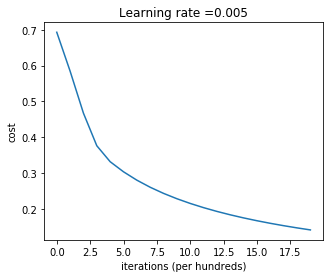

In [28]:
costs = np.squeeze(d['costs'])
plt.plot(costs)
plt.ylabel('cost')
plt.xlabel('iterations (per hundreds)')
plt.title('Learning rate =' + str(d['learning_rate']))
plt.show()